##Car Sales Preditction using Artificial Neural Networks

###Theoretical Concepts

**DataSet Description:**

The dataset contains details of the customers purschasing a car.

**Problem Statement:**

Based on the different attributes (customer details) we need to predict the amount the customers will be willing to pay for purchasing a car.

This problem is a regression type of task as we are trying to predict a continuous value.

**What is Regression?**

A statistical method that analyzes the relationship between one or more independent variables and a dependent variable.

**What is Artificial Neural Networks (ANNs) ?**

Artificial neural network is a machine learning model inspired by the human brain that can learn to recognize patterns and make predictions.

**Working of ANN**

A brief explanation of how ANNs learn:

* Step 1: The ANN is given a set of training data. This data consists of input values and the desired output values.
* Step 2: The ANN uses a learning algorithm to adjust the weights of the connections between its neurons. The goal of the learning algorithm is to minimize the error between the ANN's output and the desired output.
* Step 3: The ANN repeats steps 2 and 3 until the error is minimized.

The learning algorithm used by an ANN is typically a type of gradient descent. Gradient descent is a method for finding the minimum of a function. In the case of an ANN, the function that is being minimized is the error between the ANN's output and the desired output.

The weights of the connections between the neurons in an ANN are adjusted using a process called backpropagation. Backpropagation is a way of propagating the error from the output of the ANN back to the input of the ANN. The weights of the connections are then adjusted in a way that minimizes the error.

Use this link to play with ANN using GUI -
https://playground.tensorflow.org


**Some Terminologies for ANN:**

Input: The data that is fed into the ANN.

Weight: A value that determines how much influence an input has on the output of the ANN.

Bias: A value that is added to the output of the ANN before it is passed through the activation function.

Activation Function: A function that determines whether or not a neuron fires.

Loss Function: A function that measures the error between the ANN's output and the desired output.

Epoch: A complete pass through the training data.

###Code

In [7]:
#Uncomment the below code is you want to load csv from drive.
#Comment out the code loading the file from local runtime.
'''
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/CSV Datasets/'
filename = root_path + "Car_Purchasing_Data.csv"
'''

#Loading from local runtime
filename = "Car_Purchasing_Data.csv"

In [8]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#LOAD THE DATASET
car_df = pd.read_csv(filename, encoding="ISO-8859-1")

In [13]:
#Show entire dataset
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [14]:
#Show just first 5 rows
car_df.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


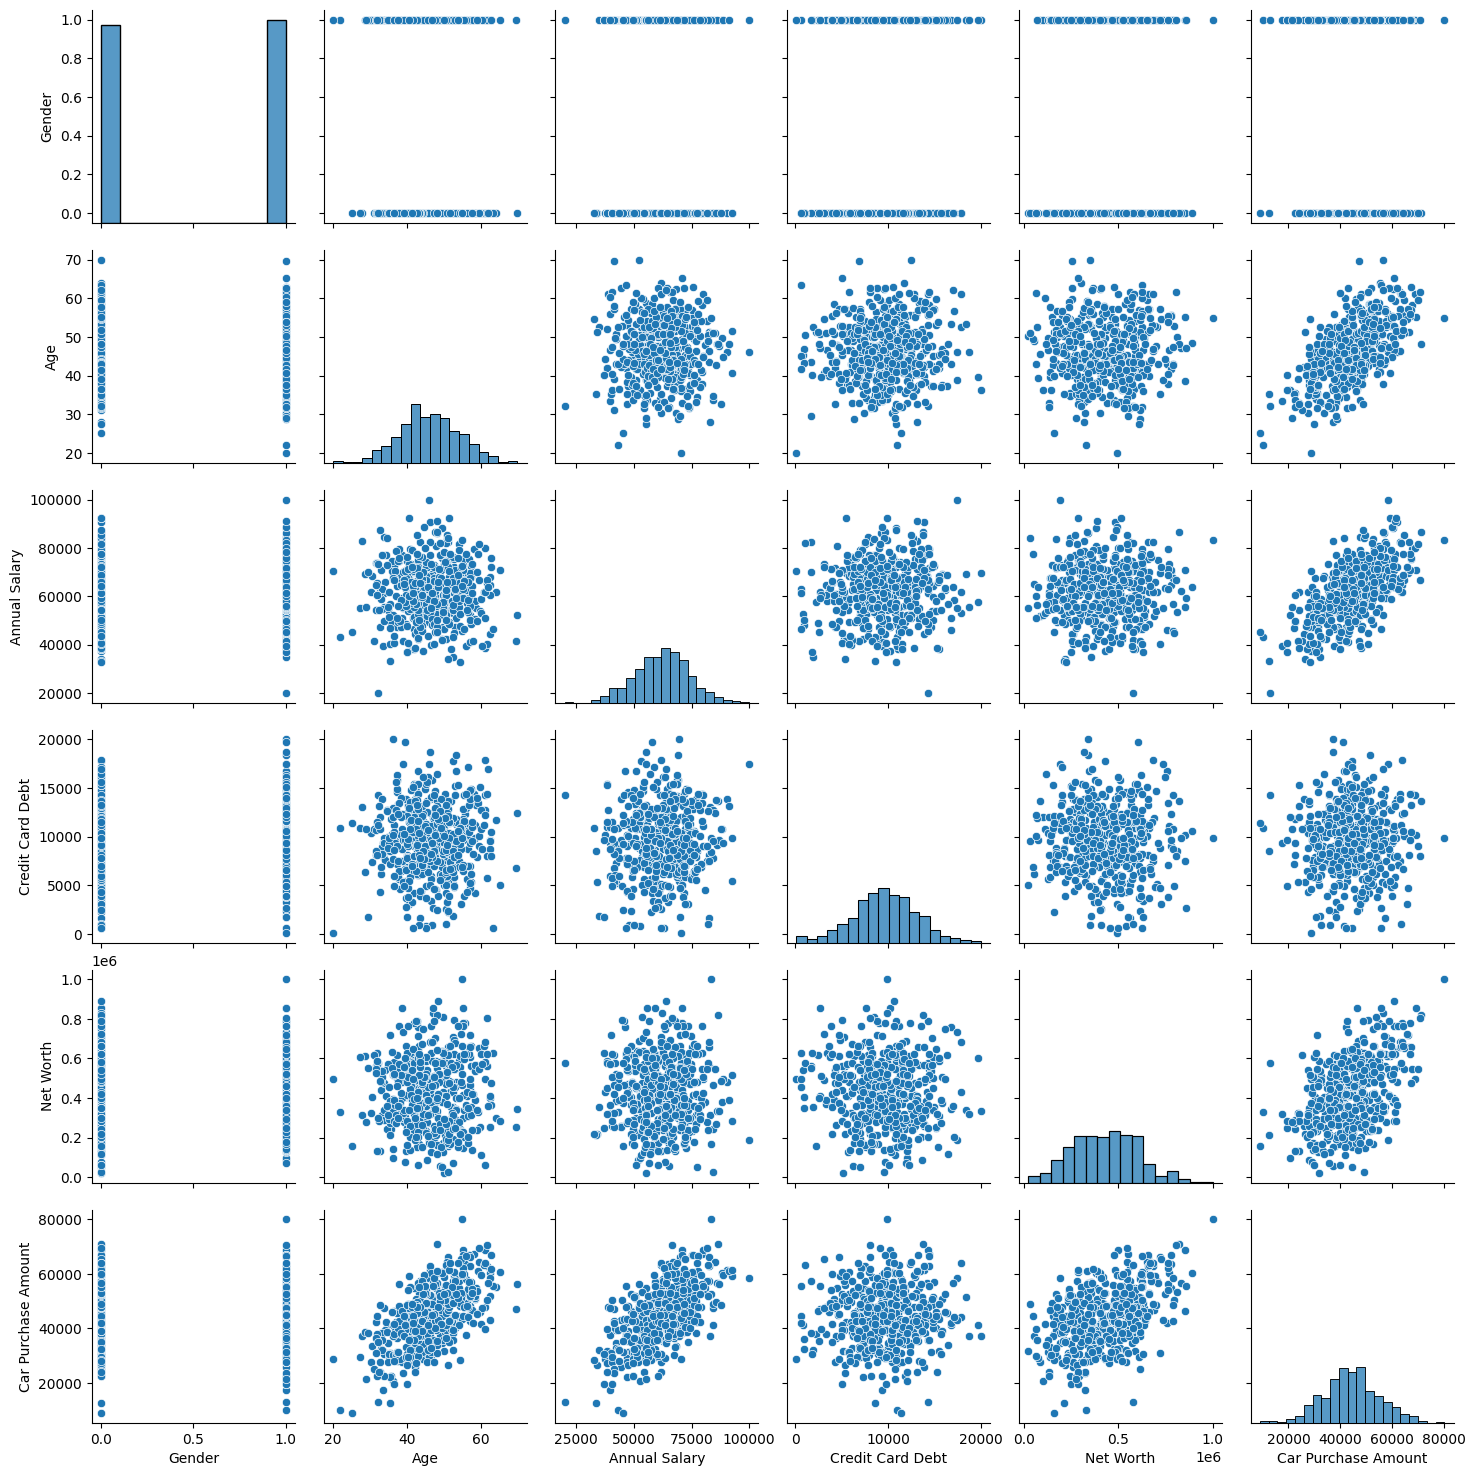

In [16]:
#Create a grid of plots,
#with each plot showing the relationship between two variables.
sns.pairplot(car_df)

**Quick Observations from above Visualization**

Target Variable: Car Purchase Amount

* As age increases, car purchase amount increases.
* As annual salary increases, car purchase amount increases.
* No clear relationship between credit card debt and card purchase amount. (But this doesn't mean it might be not affecting the purchase amount at all.)
* Higher the net worth, higher the car purchase amount.

In [18]:
#CLEANING THE DATA and CREATE TRAIN & TEST SET

#Drop the customer name and email. Not affecting the data that much.
#Country might have some relationship but for simplicity let us drop it.
clean_df = car_df.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1) #axis=1 means drop columns. 0 means rows

In [19]:
clean_df.head(5)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [22]:
#Input Data
X = clean_df.drop(["Car Purchase Amount"],axis=1)
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [31]:
#Output Data
y = clean_df["Car Purchase Amount"]
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [24]:
X.shape

(500, 5)

In [25]:
y.shape

(500,)

In [26]:
#Normalize the input data so that all the data values are in similar range.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [27]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [28]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [32]:
 y = y.values.reshape(-1,1)
 y_scaled = scaler.fit_transform(y)
 y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [36]:
#TRAINING THE MODEL

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [37]:
X_train.shape

(375, 5)

In [38]:
X_test.shape

(125, 5)

In [41]:
#SEQUENTIALLY BUILD THE ANN
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(40, input_dim=5, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear')) #Since I need to predict a value so use linear instead of Relu

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                240       
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


Explanation -

dense: 5 input * 40 neurons = 200 + 40 bias for each neuron = 240 params

dense_1: 40 input * 40 neurons = 1600 + 40 bias for each neuron in layer 2 = 1640 params

dense_2: 40 input * 1 neuron = 40 + 1 bias for neuron = 41 params

In [43]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 9.9678e-04
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 9.5513e-04
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 9.1343e-04
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 8.6432e-04
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 8.0492e-04
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 9.5315e-04 - val_loss: 7.4855e

In [47]:
#EVALUATING THE MODEL

epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

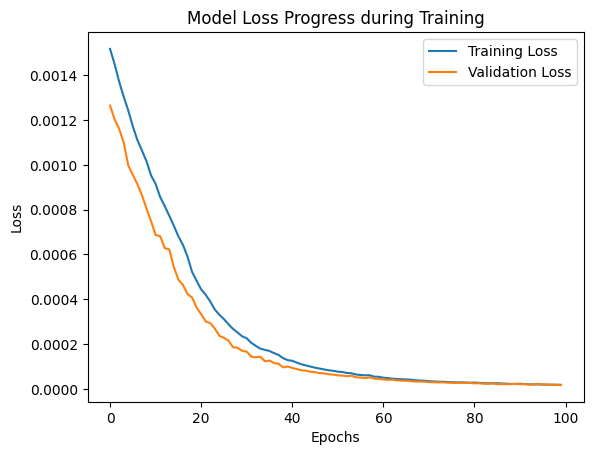

In [50]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss Progress during Training")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])

Post 60 epochs there is no significant change in the loss values so 60 epochs would ahve been enough.

In [52]:
#Check model accuracy based on the X_test and y_test data.
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 4ms/step


array([[0.673268  ],
       [0.5558589 ],
       [0.56351453],
       [0.2684568 ],
       [0.35696897],
       [0.7110589 ],
       [0.4036645 ],
       [0.50411874],
       [0.6472316 ],
       [0.47133768],
       [0.4525676 ],
       [0.5700634 ],
       [0.634502  ],
       [0.42714086],
       [0.0333032 ],
       [0.5272892 ],
       [0.61664   ],
       [0.42898625],
       [0.7019668 ],
       [0.2753828 ],
       [0.25861612],
       [0.5961377 ],
       [0.49730614],
       [0.550523  ],
       [0.52788967],
       [0.731687  ],
       [0.17717774],
       [0.6279414 ],
       [0.4930722 ],
       [0.26890156],
       [0.8172405 ],
       [0.49515566],
       [0.5986993 ],
       [0.40160528],
       [0.42666003],
       [0.20027137],
       [0.30932352],
       [0.50581723],
       [0.5538943 ],
       [0.36706206],
       [0.7164915 ],
       [0.4692057 ],
       [0.74319285],
       [0.41349477],
       [0.6490259 ],
       [0.70102483],
       [0.60647124],
       [0.337

In [58]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 2.2669031965319446e-05


In [66]:
Y_TEST = list(y_test.reshape(125))
Y_PRED = list(y_pred.reshape(125))

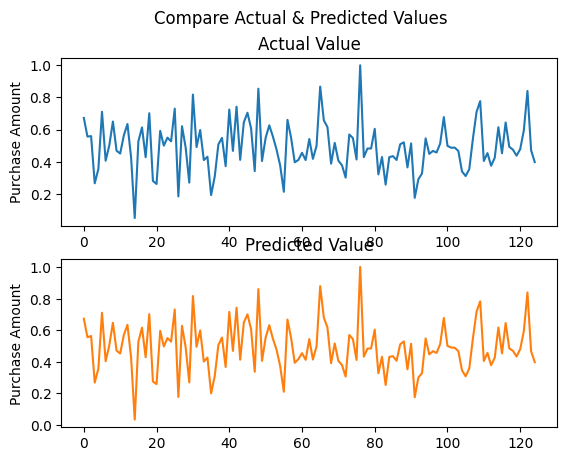

In [76]:
fig, ax = plt.subplots(2)
fig.suptitle('Compare Actual & Predicted Values')
ax[0].plot(np.arange(len(Y_TEST)), Y_TEST)
ax[0].set_ylabel("Purchase Amount")
ax[0].set_title('Actual Value')
ax[1].plot(np.arange(len(Y_PRED)), Y_PRED,'tab:orange')
ax[1].set_ylabel("Purchase Amount")
ax[1].set_title('Predicted Value')

plt.show()

In [78]:
#Predicting value for a new customer

#Gender, Age, Annual Salary, Credit Card Debt, Net Worth
new_values = np.array([[1, 50, 50000, 10000, 650000]])
pred_value = model.predict(new_values)
print("Expected Purchase Amount: ", pred_value)

1/1 [==============================] - 0s 61ms/step
Expected Purchase Amount:  [[287761.25]]
